## Improving Food Security and Crop Yield in Senegal
In this two-month Omdena Challenge, a global team of more than 40 collaborators built AI models that help to leverage machine learning to help farmers cope with increasingly erratic weather, model the fastest route to markets and mobilities across livelihood zones, and detecting problems in fields with drones and others tools. The challenge partner The Global Partnership for Sustainable Development Data (GPSDD) is a global network working together to ensure the new opportunities of data revolution are used to achieve the Sustainable Development Goals.

### The problem
At a time where the world needs to produce more with fewer resources, AI could help to transform agriculture worldwide and especially in Senegal. The ability of agricultural equipment to help actors better think, predict, and advise farmers via a variety of AI applications presents Senegal with the potential to achieve food security in the country. Senegal is among those hardest-hit by climate change, according to scientists, with populations that depend largely on agriculture losing their livelihoods due to worsening and recurrent floods and droughts.

### Datasets
Climate: Resakss : Crops (2009-2016) in Senegal

### Description
To design a model of effect of climate change on yield of crop. The model showed the effect of climate change in a certain year, and crops was the model's variable.

### Load Libraries

In [1]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation
from sklearn import metrics

### Import Data

In [2]:
df = pd.read_csv('YieldArea_F.csv', sep=';')

### Name of Coloums

* Year
* Level_1 
* Level_2
* Mean LST (Celsius)Day= Temp_D
* Mean LST (Celsius)Night= Temp_N
* NDVI Min
* NDVI Mean
* NDVI Max
* Rainfall (mm) Min= R_Min
* Rainfall (mm) Mean = R_Mean
* Rainfall (mm) Max = R_Max
* Cultivated Areas (Ha)Millet=CA_Mil
* Cultivated Areas (Ha)Corn= CA_Corn
* Cultivated Areas (Ha)Sorghum=CA_Sorg
* Cultivated Areas (Ha)Rice=CA_Rice
* Cultivated Areas (Ha)Groundnuts= CA_GN
* Production (Tons)Millet= P_Mil
* Production (Tons)Corn= P_Corn
* Production (Tons)Sorghum= P_Sorg
* Production (Tons)Rice=P_Rice
* Production (Tons)Groundnuts=P_GN
* Yield (Kg/ha)Millet= Y_Mil
* Yield (Kg/ha)Corn= Y_Corn
* Yield (Kg/ha)Sorghum= Y_Sorg
* Yield (Kg/ha)Rice= Y_Rice
* Yield (Kg/ha)Groundnut=Y_GN
* Population

### Understanding of Dataset

In [3]:
df.head ()

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
0,2009,Dakar,Rufisque,29,20,"-0,03","0,18","0,52",516,546,...,19,16,0,992,0,850,500,0,841,319097
1,2009,Dakar,Dakar,28,21,"0,22","0,44","0,72",511,558,...,0,0,0,0,0,0,0,0,0,1011821
2,2009,Dakar,Guediawaye,31,20,"-0,07","0,22","0,51",618,618,...,0,0,0,0,0,0,0,0,0,304180
3,2009,Dakar,Pikine,34,19,"-0,1","0,33","0,64",571,583,...,0,0,0,0,0,0,0,0,0,901860
4,2009,Diourbel,Bambey,38,19,"0,19","0,32","0,49",433,523,...,9,3451,0,15323,429,600,495,0,597,305362


In [4]:
df_shape =df.shape
df_shape

(360, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        360 non-null    int64 
 1   Level_1     360 non-null    object
 2   Level_2     360 non-null    object
 3   Temp_D      360 non-null    int64 
 4   Temp_N      360 non-null    int64 
 5   NDVI Min    360 non-null    object
 6   NDVI Mean   360 non-null    object
 7   NDVI Max    360 non-null    object
 8   R_Min       360 non-null    int64 
 9   R_Mean      360 non-null    int64 
 10  R_Max       360 non-null    int64 
 11  CA_Mil      360 non-null    int64 
 12  CA_Corn     360 non-null    int64 
 13  CA_Sorg     360 non-null    int64 
 14  CA_Rice     360 non-null    int64 
 15  CA_GN       360 non-null    int64 
 16  P_Mil       360 non-null    int64 
 17  P_Corn      360 non-null    int64 
 18  P_Sorg      360 non-null    int64 
 19  P_Rice      360 non-null    int64 
 20  P_GN      

In [6]:
df.describe()

,Year,Temp_D,Temp_N,R_Min,R_Mean,R_Max,CA_Mil,CA_Corn,CA_Sorg,CA_Rice,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,3.600000e+02
mean,2012.500000,34.933333,20.777778,567.861111,689.336111,858.755556,19521.144444,5478.502778,3741.430556,3080.258333,...,4892.538889,3237.011111,9963.538889,19621.675000,595.400000,1046.430556,718.336111,1434.913889,790.341667,2.981532e+05
std,2.294477,2.744658,1.142033,270.068438,318.076217,402.805325,18852.145790,10153.718365,4906.135003,7340.275630,...,7973.918497,4525.652515,34000.507203,21221.755946,364.313879,747.597169,438.650991,1819.413598,408.576232,2.451951e+05
min,2009.000000,28.000000,18.000000,113.000000,168.000000,222.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.987000e+04
25%,2010.750000,33.000000,20.000000,392.000000,461.000000,555.750000,1942.500000,114.750000,329.750000,0.000000,...,63.500000,172.250000,0.000000,1420.500000,303.750000,501.500000,463.500000,0.000000,562.500000,1.365192e+05
50%,2012.500000,36.000000,21.000000,509.000000,597.000000,717.500000,13652.000000,1379.500000,1669.000000,99.000000,...,1095.500000,1331.500000,121.500000,14223.500000,674.000000,911.000000,746.000000,1022.000000,831.000000,2.611930e+05
75%,2014.250000,37.000000,22.000000,676.500000,873.500000,1156.250000,31646.000000,6603.500000,5576.750000,2204.000000,...,6751.250000,4592.250000,4860.000000,29231.500000,852.000000,1565.500000,951.250000,2112.250000,1024.000000,3.393720e+05
max,2016.000000,39.000000,23.000000,1455.000000,1575.000000,1957.000000,83018.000000,93762.000000,33066.000000,58000.000000,...,55650.000000,29825.000000,377000.000000,117779.000000,1715.000000,3860.000000,2993.000000,7050.000000,2130.000000,1.279829e+06


In [7]:
df.index

RangeIndex(start=0, stop=360, step=1)

In [8]:
df.isnull().sum()

Year          0
Level_1       0
Level_2       0
Temp_D        0
Temp_N        0
NDVI Min      0
NDVI Mean     0
NDVI Max      0
R_Min         0
R_Mean        0
R_Max         0
CA_Mil        0
CA_Corn       0
CA_Sorg       0
CA_Rice       0
CA_GN         0
P_Mil         0
P_Corn        0
P_Sorg        0
P_Rice        0
P_GN          0
Y_Mil         0
Y_Corn        0
Y_Sorg        0
Y_Rice        0
Y_GN          0
Population    0
dtype: int64

In [9]:
df['R_Mean'].describe ()

count     360.000000
mean      689.336111
std       318.076217
min       168.000000
25%       461.000000
50%       597.000000
75%       873.500000
max      1575.000000
Name: R_Mean, dtype: float64

In [13]:
df[df["R_Mean"] == 168]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
230,2014,Saint Louis,Dagana,37,20,"-0,2","0,23","0,75",113,168,...,3315,64,30803,2631,250,2500,130,7050,260,276488


In [16]:
df[df["R_Mean"] == 1575]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
88,2010,Ziguinchor,Oussouye,29,21,"-0,18","0,46","0,85",1374,1575,...,0,0,12446,1166,816,0,0,1952,678,64850


In [10]:
df['R_Max'].describe()

count     360.000000
mean      858.755556
std       402.805325
min       222.000000
25%       555.750000
50%       717.500000
75%      1156.250000
max      1957.000000
Name: R_Max, dtype: float64

In [11]:
df[df["R_Max"] == 222]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
261,2014,Saint Louis,Saint Louis,37,19,"-0,19","0,21","0,59",146,174,...,0,87,0,413,200,0,130,0,100,118907


In [17]:
df[df["R_Max"] == 1957]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
42,2009,Ziguinchor,Bignona,30,20,"-0,2","0,51","0,85",1186,1463,...,875,170,19036,15487,747,789,800,1375,1023,310006


In [19]:
df['R_Min'].describe()

count     360.000000
mean      567.861111
std       270.068438
min       113.000000
25%       392.000000
50%       509.000000
75%       676.500000
max      1455.000000
Name: R_Min, dtype: float64

In [21]:
df[df["R_Min"] == 113]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
230,2014,Saint Louis,Dagana,37,20,"-0,2","0,23","0,75",113,168,...,3315,64,30803,2631,250,2500,130,7050,260,276488


In [22]:
df[df["R_Min"] == 1455]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
314,2015,Ziguinchor,Ziguinchor,29,20,"-0,19","0,55","0,84",1455,1572,...,191,223,11835,752,740,794,970,1973,910,263807


Saint Louis region is located in the northwest of Senegal where has a hot desert climate. One of the severe drought was in 2014.

In [23]:
df['Temp_D'].describe()


count    360.000000
mean      34.933333
std        2.744658
min       28.000000
25%       33.000000
50%       36.000000
75%       37.000000
max       39.000000
Name: Temp_D, dtype: float64

In [24]:
df[df["Temp_D"] == 39]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
187,2013,Diourbel,Diourbel,39,20,"0,2","0,3","0,44",446,497,...,283,147,0,15440,644,502,478,0,529,339238
190,2013,Fatick,Gossas,39,21,"0,2","0,31","0,46",426,458,...,10889,2402,0,51757,443,850,900,0,552,101217
203,2013,Louga,Linguere,39,22,"0,03","0,28","0,5",252,405,...,2237,99,0,22143,300,750,650,0,134,259083
206,2013,Matam,Matam,39,23,"-0,15","0,22","0,58",231,300,...,77,637,35213,1248,163,2500,168,6510,400,238605
207,2013,Diourbel,Mbacke,39,21,"0,14","0,3","0,44",409,466,...,383,197,0,24436,466,686,700,0,695,272621
213,2013,Saint Louis,Podor,39,23,"-0,15","0,21","0,66",170,262,...,2613,0,62265,0,0,2500,0,6140,0,156095
232,2014,Diourbel,Diourbel,39,20,"0,18","0,27","0,4",303,353,...,48,523,0,12000,500,400,550,0,500,350205
235,2014,Fatick,Gossas,39,21,"0,18","0,27","0,4",338,381,...,413,935,0,53379,400,500,550,0,750,104957
250,2014,Kaffrine,Maleme hodar,39,22,"0,16","0,29","0,45",346,398,...,3475,4714,19,43800,600,950,850,300,1200,383688
252,2014,Diourbel,Mbacke,39,20,"0,13","0,26","0,38",321,351,...,392,630,0,8777,400,400,600,0,400,283275


In [25]:
df['Y_Mil'].describe()

count     360.000000
mean      595.400000
std       364.313879
min         0.000000
25%       303.750000
50%       674.000000
75%       852.000000
max      1715.000000
Name: Y_Mil, dtype: float64

In [34]:
df['Y_GN'].describe()

count     360.000000
mean      790.341667
std       408.576232
min         0.000000
25%       562.500000
50%       831.000000
75%      1024.000000
max      2130.000000
Name: Y_GN, dtype: float64

In [35]:
df[df["Y_GN"] == 0]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
1,2009,Dakar,Dakar,28,21,"0,22","0,44","0,72",511,558,...,0,0,0,0,0,0,0,0,0,1011821
2,2009,Dakar,Guediawaye,31,20,"-0,07","0,22","0,51",618,618,...,0,0,0,0,0,0,0,0,0,304180
3,2009,Dakar,Pikine,34,19,"-0,1","0,33","0,64",571,583,...,0,0,0,0,0,0,0,0,0,901860
30,2009,Saint Louis,Podor,38,21,"-0,13","0,21","0,64",240,362,...,1061,385,44586,0,103,2500,90,6000,0,373294
46,2010,Dakar,Dakar,28,21,"0,21","0,43","0,7",564,598,...,0,0,0,0,0,0,0,0,0,1033850
47,2010,Dakar,Guediawaye,32,21,"-0,06","0,23","0,52",629,629,...,0,0,0,0,0,0,0,0,0,310802
48,2010,Dakar,Pikine,34,20,"-0,12","0,34","0,67",595,596,...,0,0,0,0,0,0,0,0,0,921494
75,2010,Saint Louis,Podor,37,22,"-0,13","0,24","0,64",334,465,...,5598,143,47070,0,83,2500,69,6000,0,385776
91,2011,Dakar,Dakar,28,21,"0,45","0,67","0,92",362,397,...,0,0,0,0,0,0,0,0,0,1056009
92,2011,Dakar,Guediawaye,32,20,"-0,07","0,21","0,45",437,437,...,0,0,0,0,0,0,0,0,0,317464


In [36]:
df[df["CA_GN"] == 0]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
1,2009,Dakar,Dakar,28,21,"0,22","0,44","0,72",511,558,...,0,0,0,0,0,0,0,0,0,1011821
2,2009,Dakar,Guediawaye,31,20,"-0,07","0,22","0,51",618,618,...,0,0,0,0,0,0,0,0,0,304180
3,2009,Dakar,Pikine,34,19,"-0,1","0,33","0,64",571,583,...,0,0,0,0,0,0,0,0,0,901860
30,2009,Saint Louis,Podor,38,21,"-0,13","0,21","0,64",240,362,...,1061,385,44586,0,103,2500,90,6000,0,373294
46,2010,Dakar,Dakar,28,21,"0,21","0,43","0,7",564,598,...,0,0,0,0,0,0,0,0,0,1033850
47,2010,Dakar,Guediawaye,32,21,"-0,06","0,23","0,52",629,629,...,0,0,0,0,0,0,0,0,0,310802
48,2010,Dakar,Pikine,34,20,"-0,12","0,34","0,67",595,596,...,0,0,0,0,0,0,0,0,0,921494
75,2010,Saint Louis,Podor,37,22,"-0,13","0,24","0,64",334,465,...,5598,143,47070,0,83,2500,69,6000,0,385776
91,2011,Dakar,Dakar,28,21,"0,45","0,67","0,92",362,397,...,0,0,0,0,0,0,0,0,0,1056009
92,2011,Dakar,Guediawaye,32,20,"-0,07","0,21","0,45",437,437,...,0,0,0,0,0,0,0,0,0,317464


In West African agriculture, management of soil fertilityrelies largely on fallowing. During the fallow period, which traditionally lasts more than20 years after five to six years of cultivation, the naturalvegetation tends to recover a floristic composition similar to that before the cropping period. This process participates inthe restoration of the soil fertility and ecosystem biodiversity andproductivity. (https://www.researchgate.net/publication/227764521_Soil_properties_and_plant_production_after_short-term_fallows_in_Senegal)

In [37]:
df[(df['Y_Mil'] == 0) & (df['Y_Corn'] != 0)]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
0,2009,Dakar,Rufisque,29,20,"-0,03","0,18","0,52",516,546,...,19,16,0,992,0,850,500,0,841,319097
17,2009,Kedougou,Kedougou,34,22,"0,18","0,49","0,74",1003,1248,...,3306,179,97,2464,0,1897,985,1060,1019,68968
18,2009,Kedougou,Salemata,34,22,"0,21","0,51","0,73",1278,1411,...,1469,971,15,851,0,1837,949,1060,1055,19870
19,2009,Kedougou,Saraya,34,21,"-0,05","0,48","0,73",894,1090,...,1130,1204,175,2376,0,1471,968,1060,1043,36925
45,2010,Dakar,Rufisque,30,21,"-0,04","0,18","0,53",534,566,...,426,152,0,1250,0,1100,681,0,700,326044
62,2010,Kedougou,Kedougou,33,22,"0,17","0,5","0,75",1033,1379,...,5127,614,503,2799,0,1874,993,1130,1015,71241
63,2010,Kedougou,Salemata,33,22,"0,19","0,51","0,73",1336,1451,...,1477,407,294,1110,0,1832,925,998,1055,20524
64,2010,Kedougou,Saraya,33,22,"-0,07","0,49","0,73",1018,1204,...,2076,2123,696,3047,0,1460,949,1045,1031,38143
90,2011,Dakar,Rufisque,30,21,"-0,04","0,17","0,49",402,418,...,339,73,0,1928,0,890,580,0,633,333032
135,2012,Dakar,Rufisque,29,21,"0,24","0,42","0,75",601,646,...,826,165,0,1313,0,1004,462,0,702,340007


In [64]:
df['Y_Crops']= df['Y_Mil']+ df['Y_Corn']+ df['Y_Sorg']+ df['Y_Rice']+ df['Y_GN']/5

In [65]:
df.head()

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population,Y_Crops
0,2009,Dakar,Rufisque,29,20,"-0,03","0,18","0,52",516,546,...,16,0,992,0,850,500,0,841,319097,1518.2
1,2009,Dakar,Dakar,28,21,"0,22","0,44","0,72",511,558,...,0,0,0,0,0,0,0,0,1011821,0.0
2,2009,Dakar,Guediawaye,31,20,"-0,07","0,22","0,51",618,618,...,0,0,0,0,0,0,0,0,304180,0.0
3,2009,Dakar,Pikine,34,19,"-0,1","0,33","0,64",571,583,...,0,0,0,0,0,0,0,0,901860,0.0
4,2009,Diourbel,Bambey,38,19,"0,19","0,32","0,49",433,523,...,3451,0,15323,429,600,495,0,597,305362,1643.4


During data digging I found some inaccuracies in the data. While there was no cultivated crop, crop yields were given for the same crop. 

In [96]:
df[(df['CA_Mil'] == 0) & (df['Y_Mil'] != 0)]

,Year,Level_1,Level_2,Temp_D,Temp_N,NDVI Min,NDVI Mean,NDVI Max,R_Min,R_Mean,...,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population,Y_Crops
108,2011,Kedougou,Salemata,34,22,"0,2","0,5","0,72",1118,1279,...,36,58,537,900,963,229,998,1055,21086,3301.0
109,2011,Kedougou,Saraya,34,22,"-0,06","0,48","0,72",791,970,...,737,119,2178,900,517,657,1045,1245,39185,3368.0
270,2015,Tambacounda,Bakel,36,22,"-0,12","0,36","0,64",422,773,...,5230,2800,2370,1142,2125,1980,7000,971,520960,12441.2
274,2015,Sedhiou,Bounkiling,33,21,"-0,11","0,49","0,71",809,1046,...,7644,36908,21919,945,1801,1160,2850,1229,318303,7001.8
292,2015,Tambacounda,Koupentoump,37,22,"0,17","0,35","0,53",458,581,...,10860,220,44711,918,922,928,1100,971,295745,4062.2
295,2015,Kaffrine,Maleme hodar,37,21,"0,17","0,3","0,46",505,565,...,8782,68,47076,838,1016,898,700,958,394497,3643.6
297,2015,Diourbel,Mbacke,37,20,"0,14","0,27","0,39",490,542,...,2006,0,29426,797,850,900,0,850,294279,2717.0
310,2015,Tambacounda,Tambacounda,34,22,"0,05","0,44","0,74",566,915,...,12916,2365,35458,844,1004,950,2750,1052,705317,5758.4


As can be seen from the data set, there are some incorrect information. Therefore, I decided to drop all these columns and rows.

In [97]:
df= df.drop(df[(df['CA_Mil'] == 0) & (df['Y_Mil'] != 0)].index)
df= df.drop(df[(df['CA_Corn'] == 0) & (df['Y_Corn'] != 0)].index)
df= df.drop(df[(df['CA_Sorg'] == 0) & (df['Y_Sorg'] != 0)].index)
df= df.drop(df[(df['CA_Rice'] == 0) & (df['Y_Rice'] != 0)].index)
df= df.drop(df[(df['CA_GN'] == 0) & (df['Y_GN'] != 0)].index)

In [98]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 359
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        335 non-null    int64  
 1   Level_1     335 non-null    object 
 2   Level_2     335 non-null    object 
 3   Temp_D      335 non-null    int64  
 4   Temp_N      335 non-null    int64  
 5   NDVI Min    335 non-null    object 
 6   NDVI Mean   335 non-null    object 
 7   NDVI Max    335 non-null    object 
 8   R_Min       335 non-null    int64  
 9   R_Mean      335 non-null    int64  
 10  R_Max       335 non-null    int64  
 11  CA_Mil      335 non-null    int64  
 12  CA_Corn     335 non-null    int64  
 13  CA_Sorg     335 non-null    int64  
 14  CA_Rice     335 non-null    int64  
 15  CA_GN       335 non-null    int64  
 16  P_Mil       335 non-null    int64  
 17  P_Corn      335 non-null    int64  
 18  P_Sorg      335 non-null    int64  
 19  P_Rice      335 non-null    i

Columns whose DTypes are objects have been removed

In [105]:
df=df.drop(columns=['NDVI Min', 'NDVI Mean','NDVI Max', 'Level_1', 'Level_2'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 359
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        335 non-null    int64  
 1   Temp_D      335 non-null    int64  
 2   Temp_N      335 non-null    int64  
 3   R_Min       335 non-null    int64  
 4   R_Mean      335 non-null    int64  
 5   R_Max       335 non-null    int64  
 6   CA_Mil      335 non-null    int64  
 7   CA_Corn     335 non-null    int64  
 8   CA_Sorg     335 non-null    int64  
 9   CA_Rice     335 non-null    int64  
 10  CA_GN       335 non-null    int64  
 11  P_Mil       335 non-null    int64  
 12  P_Corn      335 non-null    int64  
 13  P_Sorg      335 non-null    int64  
 14  P_Rice      335 non-null    int64  
 15  P_GN        335 non-null    int64  
 16  Y_Mil       335 non-null    int64  
 17  Y_Corn      335 non-null    int64  
 18  Y_Sorg      335 non-null    int64  
 19  Y_Rice      335 non-null    i

In [107]:
df.corr()

,Year,Temp_D,Temp_N,R_Min,R_Mean,R_Max,CA_Mil,CA_Corn,CA_Sorg,CA_Rice,...,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population,Y_Crops
Year,1.000000,0.048357,0.039098,-0.101053,-0.096120,-0.095972,-0.054069,0.131437,0.083844,0.121952,...,0.033085,0.055771,-0.036357,-0.036154,0.135854,0.044048,0.040449,-0.052854,0.054759,0.069766
Temp_D,0.048357,1.000000,0.008312,-0.652619,-0.631930,-0.581560,0.459012,0.215839,0.166698,-0.149487,...,0.177409,-0.019809,0.322422,0.121756,-0.067715,0.052623,-0.032590,-0.089549,-0.066338,-0.019619
Temp_N,0.039098,0.008312,1.000000,0.077508,0.168836,0.233878,-0.218008,0.113209,0.287603,0.005293,...,0.284589,0.042421,-0.133788,0.062972,0.435926,0.278178,0.377876,0.207514,-0.232850,0.462612
R_Min,-0.101053,-0.652619,0.077508,1.000000,0.973729,0.907830,-0.247140,-0.050760,-0.030127,0.082784,...,-0.011921,-0.121401,-0.106301,0.160651,0.294263,0.315473,-0.000579,0.479398,-0.180924,0.179835
R_Mean,-0.096120,-0.631930,0.168836,0.973729,1.000000,0.971733,-0.261776,-0.045541,0.016247,0.111165,...,0.028120,-0.093175,-0.110722,0.207838,0.362228,0.381628,0.078222,0.536214,-0.218106,0.276261
R_Max,-0.095972,-0.581560,0.233878,0.907830,0.971733,1.000000,-0.238363,-0.023111,0.072336,0.118918,...,0.086756,-0.079340,-0.086215,0.261601,0.419070,0.458421,0.126312,0.579790,-0.248526,0.349824
CA_Mil,-0.054069,0.459012,-0.218008,-0.247140,-0.261776,-0.238363,1.000000,0.287881,0.256461,-0.223883,...,0.206005,-0.126027,0.652217,0.339052,-0.031910,0.160453,-0.186688,0.137375,0.027471,-0.061807
CA_Corn,0.131437,0.215839,0.113209,-0.050760,-0.045541,-0.023111,0.287881,1.000000,0.206511,-0.069459,...,0.222095,-0.080524,0.394562,0.202531,0.151911,0.215537,-0.044682,0.135802,-0.061419,0.083809
CA_Sorg,0.083844,0.166698,0.287603,-0.030127,0.016247,0.072336,0.256461,0.206511,1.000000,-0.071945,...,0.837248,-0.080004,0.341741,0.303096,0.147253,0.196792,0.061560,0.283058,-0.058891,0.174278
CA_Rice,0.121952,-0.149487,0.005293,0.082784,0.111165,0.118918,-0.223883,-0.069459,-0.071945,1.000000,...,-0.054348,0.760807,-0.164168,0.002482,0.206719,-0.063868,0.445939,-0.027395,-0.051714,0.367948


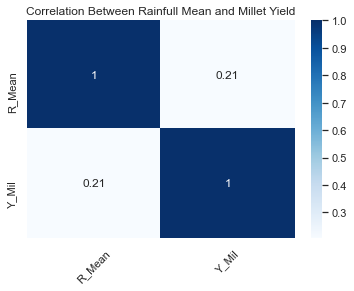

In [108]:
sns.heatmap(df[['R_Mean','Y_Mil']].corr(),annot=True,cmap='Blues')
plt.title("Correlation Between Rainfull Mean and Millet Yield")
plt.xticks (rotation=45)
plt.show()

### Data Visualization

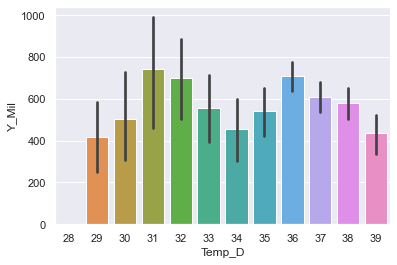

In [109]:
sns.set() # get default seaborn style
sns.barplot(x='Temp_D', y='Y_Mil', data=df)
plt.xlabel('Temp_D')
plt.ylabel('Y_Mil')
plt.show()

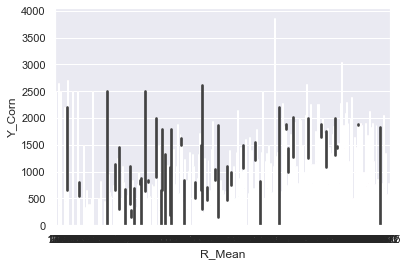

In [110]:
sns.set() # get default seaborn style
sns.barplot(x='R_Mean', y='Y_Corn', data=df)
plt.xlabel('R_Mean')
plt.ylabel('Y_Corn')
plt.show()

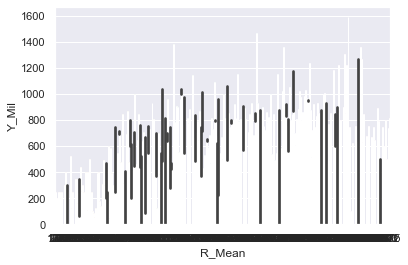

In [111]:
sns.set() # get default seaborn style
sns.barplot(x='R_Mean', y='Y_Mil', data=df)
plt.xlabel('R_Mean')
plt.ylabel('Y_Mil')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Y_Corn'>

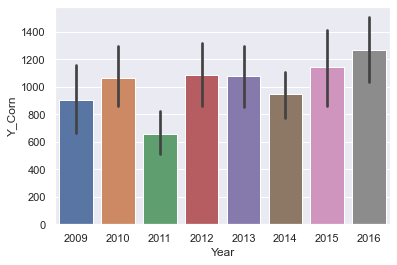

In [112]:
sns.barplot (df['Year'], df["Y_Corn"])

<AxesSubplot:xlabel='Year', ylabel='Y_Crops'>

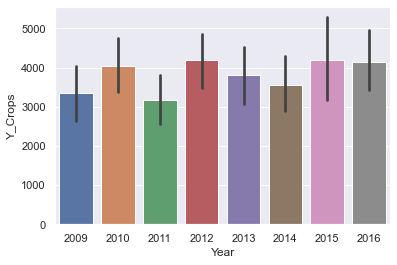

In [113]:
sns.barplot (df['Year'], df["Y_Crops"])

<AxesSubplot:xlabel='R_Mean', ylabel='Y_Crops'>

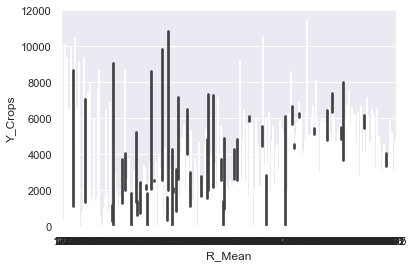

In [114]:
sns.barplot (df['R_Mean'], df["Y_Crops"])

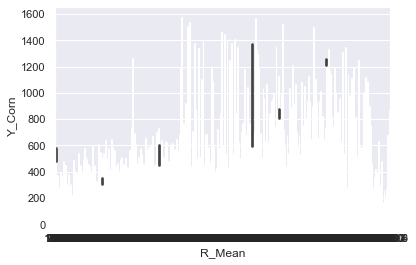

In [115]:
sns.set() # get default seaborn style
sns.barplot(x='Y_Crops', y='R_Mean', data=df)
plt.xlabel('R_Mean')
plt.ylabel('Y_Corn')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Y_Corn'>

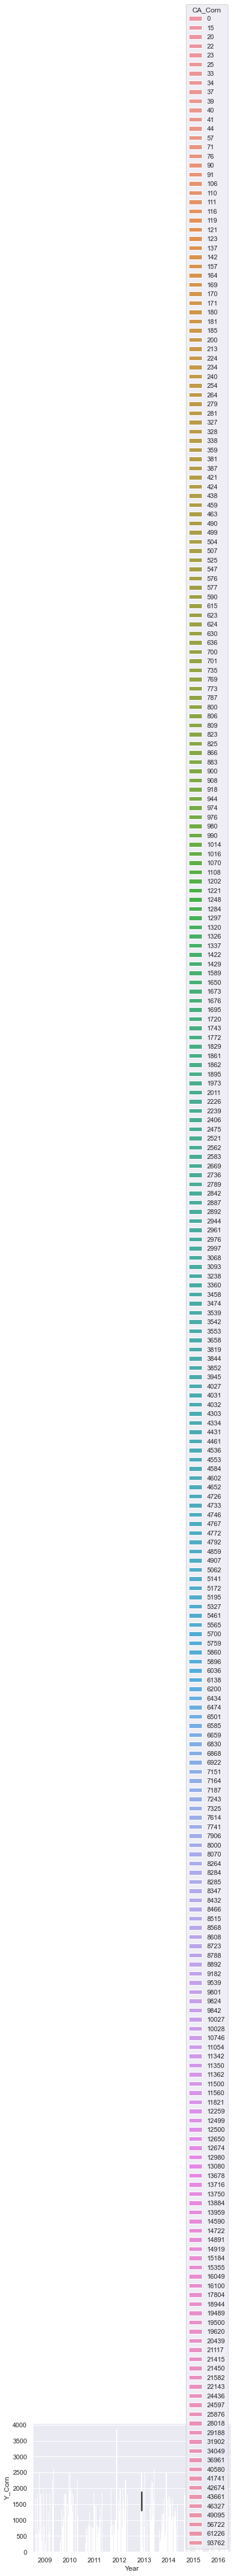

In [116]:
sns.barplot (df['Year'], df["Y_Corn"], hue= df['CA_Corn'])

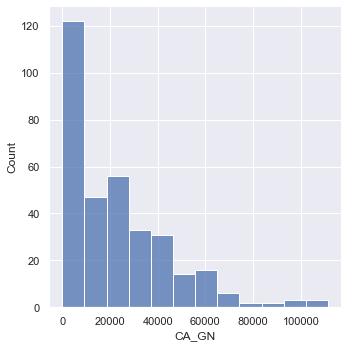

In [117]:
sns.displot (df ['CA_GN'])

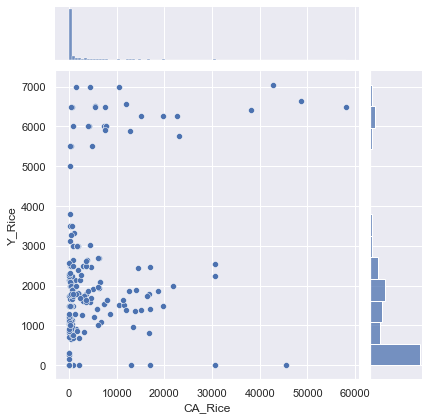

In [118]:
sns.jointplot (df["CA_Rice"] , df ['Y_Rice'])

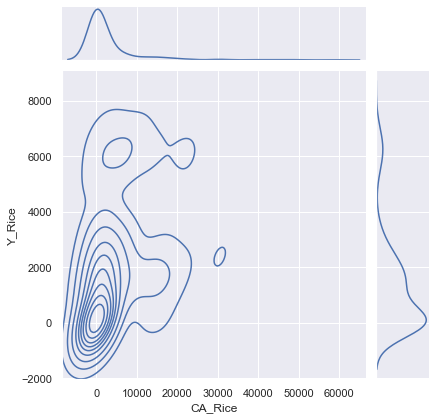

In [119]:
sns.jointplot (df["CA_Rice"] , df ['Y_Rice'], kind= 'kde')

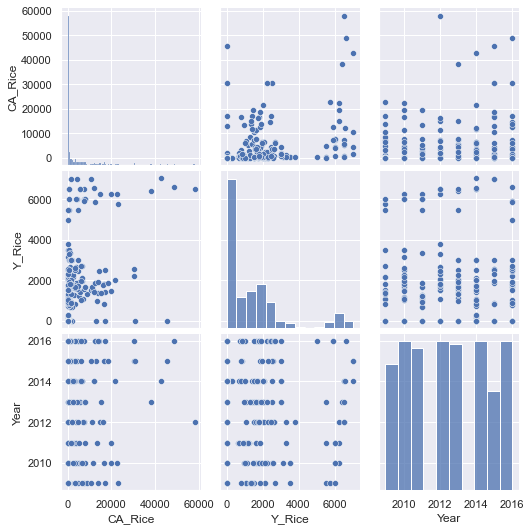

In [120]:
sns.pairplot (df[["CA_Rice", 'Y_Rice', 'Year']])

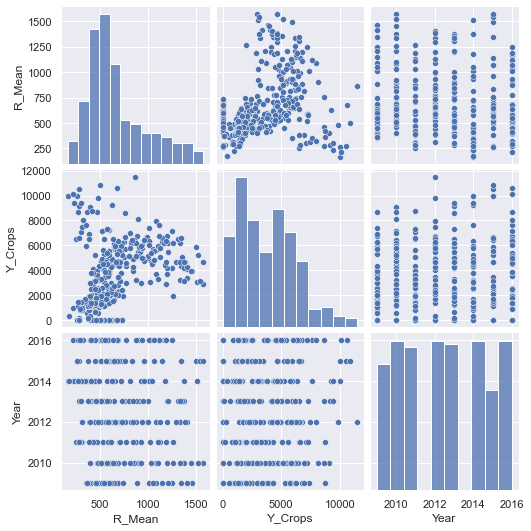

In [121]:
sns.pairplot (df[["R_Mean", 'Y_Crops', 'Year']])

<AxesSubplot:xlabel='CA_GN', ylabel='Year'>

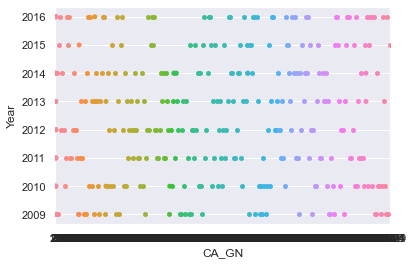

In [122]:
sns.stripplot (df["CA_GN"], df['Year'])

<AxesSubplot:xlabel='CA_GN', ylabel='Year'>

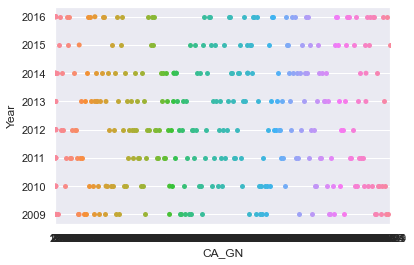

In [123]:
sns.stripplot (df["CA_GN"], df['Year'], jitter= True)

<AxesSubplot:xlabel='CA_GN', ylabel='Y_GN'>

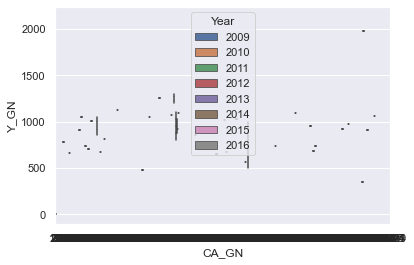

In [124]:
sns.boxplot (df["CA_GN"], df ['Y_GN'], hue= df['Year'],)

<AxesSubplot:xlabel='Y_Corn', ylabel='count'>

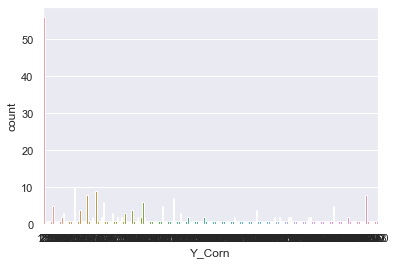

In [125]:
sns.countplot ( df["Y_Corn"])

<AxesSubplot:xlabel='Y_Corn', ylabel='R_Mean'>

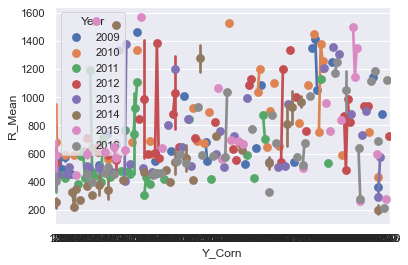

In [126]:
sns.pointplot (df['Y_Corn'], df['R_Mean'], hue= df['Year'])

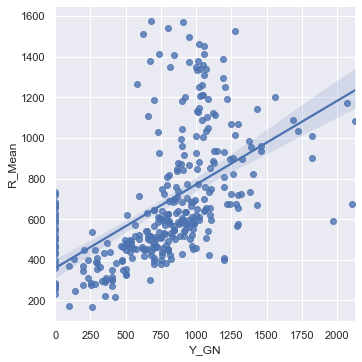

In [127]:
sns.lmplot (x= 'Y_GN', y= 'R_Mean', data = df)

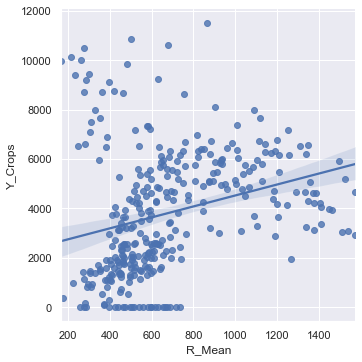

In [128]:
sns.lmplot (x= 'R_Mean', y= 'Y_Crops', data = df)

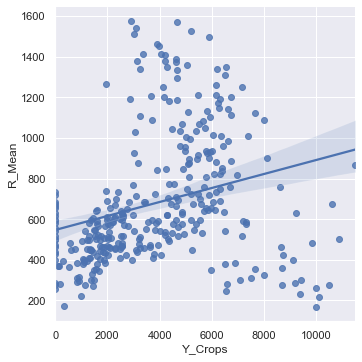

In [129]:
sns.lmplot (x= 'Y_Crops', y= 'R_Mean' , data = df)

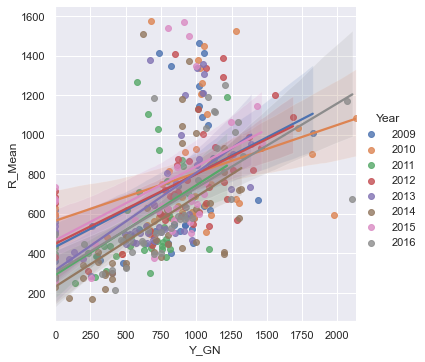

In [130]:
sns.lmplot (x= 'Y_GN', y= 'R_Mean', hue= 'Year', data = df)

## Prepare Train and Test Data

In [131]:
X=df.drop ('Y_Crops', axis=1)
y= df['Y_Crops']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 49)

### EDA & Data Preprocessing

In [133]:
X_train.head()

,Year,Temp_D,Temp_N,R_Min,R_Mean,R_Max,CA_Mil,CA_Corn,CA_Sorg,CA_Rice,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
211,2013,29,21,1190,1378,1530,204,1429,0,4309,...,48,0,6818,1429,650,767,0,1582,671,296496
26,2009,36,22,392,539,721,9778,23,9313,0,...,39,13774,0,247,963,1710,1479,0,258,202948
158,2012,36,18,500,596,735,30703,0,129,0,...,0,77,0,28939,625,0,600,0,789,277308
336,2016,38,21,500,587,748,37368,16049,13959,98,...,19435,9422,88,54524,590,1211,675,900,872,182183
100,2011,37,21,417,458,534,26884,2961,1243,0,...,2297,498,0,20452,759,776,401,0,767,109348


In [134]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 211 to 182
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        268 non-null    int64
 1   Temp_D      268 non-null    int64
 2   Temp_N      268 non-null    int64
 3   R_Min       268 non-null    int64
 4   R_Mean      268 non-null    int64
 5   R_Max       268 non-null    int64
 6   CA_Mil      268 non-null    int64
 7   CA_Corn     268 non-null    int64
 8   CA_Sorg     268 non-null    int64
 9   CA_Rice     268 non-null    int64
 10  CA_GN       268 non-null    int64
 11  P_Mil       268 non-null    int64
 12  P_Corn      268 non-null    int64
 13  P_Sorg      268 non-null    int64
 14  P_Rice      268 non-null    int64
 15  P_GN        268 non-null    int64
 16  Y_Mil       268 non-null    int64
 17  Y_Corn      268 non-null    int64
 18  Y_Sorg      268 non-null    int64
 19  Y_Rice      268 non-null    int64
 20  Y_GN        268 non-null    in

In [135]:
X_train.describe()

,Year,Temp_D,Temp_N,R_Min,R_Mean,R_Max,CA_Mil,CA_Corn,CA_Sorg,CA_Rice,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,2.680000e+02
mean,2012.477612,34.914179,20.735075,570.608209,686.205224,847.835821,20188.115672,5753.328358,3871.470149,3043.951493,...,4894.652985,3152.656716,9856.981343,19892.156716,591.447761,1015.279851,695.578358,1284.664179,776.619403,2.985381e+05
std,2.264252,2.835718,1.098501,267.080413,311.615746,389.079856,19537.638268,10524.999772,4784.216688,7082.512303,...,8107.376984,4405.056011,36625.353116,21944.858545,362.684623,725.010019,440.302030,1731.216203,409.500825,2.478457e+05
min,2009.000000,28.000000,18.000000,141.000000,174.000000,222.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.052400e+04
25%,2011.000000,33.000000,20.000000,402.750000,466.750000,558.750000,3518.250000,142.000000,334.000000,0.000000,...,65.500000,149.250000,0.000000,1296.750000,300.000000,501.500000,400.750000,0.000000,562.500000,1.215792e+05
50%,2012.000000,36.000000,21.000000,513.500000,597.000000,707.500000,13652.000000,1619.500000,1938.000000,99.000000,...,1000.500000,1295.500000,73.500000,13894.000000,651.500000,850.000000,703.500000,858.500000,831.000000,2.612245e+05
75%,2014.000000,37.000000,22.000000,678.500000,848.250000,1098.500000,32333.750000,7201.000000,6165.500000,2371.250000,...,6719.750000,4524.500000,4810.750000,29009.750000,850.000000,1500.000000,950.000000,1869.000000,1018.250000,3.413988e+05
max,2016.000000,39.000000,23.000000,1455.000000,1575.000000,1957.000000,83018.000000,93762.000000,26511.000000,58000.000000,...,55650.000000,25185.000000,377000.000000,117779.000000,1590.000000,3860.000000,2993.000000,7000.000000,2130.000000,1.252786e+06


In [136]:
X_train.corr()

,Year,Temp_D,Temp_N,R_Min,R_Mean,R_Max,CA_Mil,CA_Corn,CA_Sorg,CA_Rice,...,P_Corn,P_Sorg,P_Rice,P_GN,Y_Mil,Y_Corn,Y_Sorg,Y_Rice,Y_GN,Population
Year,1.000000,0.019824,0.121834,-0.103309,-0.092093,-0.084189,-0.062656,0.124882,0.075340,0.129162,...,0.091705,0.027483,0.090941,-0.049591,-0.046557,0.129021,0.047981,0.100791,-0.046979,0.045893
Temp_D,0.019824,1.000000,0.027542,-0.674639,-0.653798,-0.599314,0.505039,0.222299,0.168492,-0.200955,...,0.062646,0.179832,-0.017727,0.368407,0.142986,-0.013187,0.099155,-0.030067,-0.060451,-0.056939
Temp_N,0.121834,0.027542,1.000000,0.023300,0.112319,0.184270,-0.220603,0.117562,0.265625,0.008783,...,0.184848,0.274046,0.038765,-0.133822,0.055509,0.447054,0.276234,0.394663,0.190980,-0.219108
R_Min,-0.103309,-0.674639,0.023300,1.000000,0.974799,0.907252,-0.277726,-0.050356,-0.051750,0.119702,...,0.128369,-0.022274,-0.129929,-0.122856,0.155427,0.255294,0.266401,0.015970,0.451578,-0.170709
R_Mean,-0.092093,-0.653798,0.112319,0.974799,1.000000,0.970333,-0.299589,-0.047181,-0.006818,0.158985,...,0.153501,0.021361,-0.101955,-0.133386,0.206752,0.321757,0.335347,0.085162,0.510231,-0.201784
R_Max,-0.084189,-0.599314,0.184270,0.907252,0.970333,1.000000,-0.286778,-0.025803,0.052296,0.180670,...,0.195521,0.085790,-0.084587,-0.117117,0.265551,0.384765,0.420192,0.130842,0.557280,-0.230848
CA_Mil,-0.062656,0.505039,-0.220603,-0.277726,-0.299589,-0.286778,1.000000,0.293732,0.263063,-0.219457,...,0.252572,0.206754,-0.115451,0.644338,0.319196,-0.039196,0.127646,-0.198793,0.103606,0.049595
CA_Corn,0.124882,0.222299,0.117562,-0.050356,-0.047181,-0.025803,0.293732,1.000000,0.204004,-0.054537,...,0.466741,0.218452,-0.077279,0.382760,0.209414,0.174432,0.239458,-0.029344,0.149085,-0.013262
CA_Sorg,0.075340,0.168492,0.265625,-0.051750,-0.006818,0.052296,0.263063,0.204004,1.000000,-0.065356,...,0.343566,0.835695,-0.086321,0.378514,0.304221,0.141863,0.198832,0.039384,0.295880,-0.036169
CA_Rice,0.129162,-0.200955,0.008783,0.119702,0.158985,0.180670,-0.219457,-0.054537,-0.065356,1.000000,...,-0.009429,-0.050407,0.827042,-0.165516,0.004004,0.182506,-0.042963,0.458165,-0.025398,-0.050428


### Build Machine Learning Model

#### Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
#fit model to our training data
linear_regressor.fit(X_train, y_train) 
# make predictions
y_pred1 = linear_regressor.predict(X_test)

In [138]:
print('MSE is:', metrics.mean_squared_error(y_test, y_pred1))
print('MSA is:', metrics.mean_absolute_error(y_test, y_pred1))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MSE is: 1.1076655033250563e-22
MSA is: 7.765973402219556e-12
RMSE is: 1.0524568890577211e-11


##### Random Forest Regressor

In [139]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(random_state =42, max_depth=15)
#Train the model
regressor.fit(X_train,y_train)
# prediction on test set
y_pred=regressor.predict(X_test)

In [140]:
print('MSE is:', metrics.mean_squared_error(y_test, y_pred))
print('MSA is:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE is: 236962.49868641494
MSA is: 336.6032283582093
RMSE is: 486.78794016123175


#### Decision Tree Regressor

In [141]:
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
# Create Decision Tree regressor object
clf = DecisionTreeRegressor(random_state = 42, max_depth = 15)
# Train Decision Tree Regressor
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred2 = clf.predict(X_test)

In [142]:
print('MSE is:', metrics.mean_squared_error(y_test, y_pred2))
print('MSA is:', metrics.mean_absolute_error(y_test, y_pred2))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MSE is: 343638.8788059702
MSA is: 413.34328358208955
RMSE is: 586.2071978455828


### Perform Hyperparameter Tuning

In [143]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [144]:
rf = RandomForestRegressor(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [145]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.1min finished


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [146]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 500}

In [147]:
y_pred_new=grid_search.predict(X_test)
print('MSE is:', metrics.mean_squared_error(y_test, y_pred_new))
print('MSA is:', metrics.mean_absolute_error(y_test, y_pred_new))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_new)))

MSE is: 212316.46197898922
MSA is: 326.3702557230579
RMSE is: 460.7781049257758
